# **Transfer Learning Experiments: Generalization with CORS-ADD-HBB Data**

<p align="center">
    <img src="https://github.com/RSandAI/Comprehensive-YOLO-Airplane-Detection/blob/main/assets/image.png" height=450 width=1280 alt=""/>
</p>

<small>Picture Source: <a href="https://github.com/RSandAI/Comprehensive-YOLO-Airplane-Detection/">RSandAI, Comprehensive YOLO Airplane Detection</a></small>

<br>

## **Introduction**
Transfer learning, a technique widely employed in the domain of computer vision, involves leveraging knowledge from pre-trained models on one task to improve performance on a related task. In this experiment, we explore the efficacy of transfer learning with the CORS-ADD-HBB dataset to enhance the generalization capabilities of YOLOv8 and YOLOv9 architectures originally trained on the HRPlanes dataset.


## **Dataset Description**
The CORS-ADD-HBB dataset serves as a diverse and comprehensive testbed for evaluating model robustness and adaptability across various domains. Its curated collection of data points encompasses a wide range of scenarios, facilitating a rigorous assessment of model generalization.



## **Model Initialization**
We initialize the YOLOv8 and YOLOv9 models with weights pre-trained on the HRPlanes dataset. These pre-trained models have learned rich representations of objects within Very High Resolution (VHR) Google Earth images, providing a strong starting point for transfer learning.

## **Transfer Learning Process**

Rather than fine-tuning the entire model, we adopt a transfer learning approach where we freeze the weights of the initial layers and only update the weights of the final classification layers. This allows us to transfer knowledge from the HRPlanes dataset to the CORS-ADD-HBB dataset while minimizing the risk of overfitting.

## **Experiment Setup**
1. **Dataset Preparation**: The CORS-ADD-HBB dataset is utilized as the target domain data for transfer learning.
2. **Model Initialization**: We initialize the YOLOv8 and YOLOv9 models with pre-trained weights from the HRPlanes dataset.
3. **Transfer Learning**: The weights of the final classification layers are fine-tuned using the CORS-ADD-HBB dataset while keeping the initial layers frozen.
4. **Training**: We train the models for 5 epochs to allow them to adapt to the nuances of the new dataset.

## **Evaluation**
Post-transfer learning, we evaluate the performance of the models on the CORS-ADD-HBB test set to assess their generalization capabilities. Performance metrics such as precision, recall, and mean average precision (mAP) are computed for both YOLOv8 and YOLOv9 models.

**Top 2 YOLOv8 Models:**

| Rank | Experiment ID | Model | Network size | Optimizer | Augmentation | F1 Score | Precision | Recall | mAP50 | mAP75 | mAP50-95 |
|--|--|--|--|--|--|--|--|--|--|--|--|
| 1 | 12 | YOLOv8x | 960x960 | SGD | Hue (0.015) - Saturation (0.7) - Value (0.4) - Mosaic | 0.9932 | 0.9915 | 0.9950 | 0.9939 | 0.9925 | 0.8990 |
| 2 | 32 | YOLOv8l | 960x960 | ADAMW | Hue (0.015) - Saturation (0.7) - Value (0.4) - Mosaic | 0.9930 | 0.9927 | 0.9933 | 0.9936 | 0.9887 | 0.9025 |
| 3 | 30 | YOLOv8l | 960x960 | SGD | Hue (0.015) - Saturation (0.7) - Value (0.4) - Mosaic | 0.9922 | 0.9903 | 0.9940 | 0.9941 | 0.9917 | 0.9021 |

<br>

**Top 2 YOLOv9 Models:**

| Rank | Experiment ID | Model | Network size | Optimizer | Augmentation | F1 Score | Precision | Recall | mAP50 | mAP50-95 |
|--|--|--|--|--|--|--|--|--|--|--|
| 1 | 58 | YOLOv9e | 640x640 | SGD | Hue (0.015) - Saturation (0.7) - Value (0.4) - Mosaic | 0.9917 | 0.9918 | 0.9916 | 0.9937 | 0.8989 |
| 2 | 57 | YOLOv9e | 640x640 | SGD | None | 0.9899 | 0.9912 | 0.9886 | 0.9935 | 0.8982 |
| 3 | 62 | YOLOv9e | 640x640 | ADAMW | Hue (0.015) - Saturation (0.7) - Value (0.4) - Mosaic | 0.9899 | 0.9891 | 0.9907 | 0.9936 | 0.8930 |

<br>

Make sure your runtime is **GPU** (_not_ CPU or TPU). And if it is an option, make sure you are using _Python 3_. You can select these settings by going to `Runtime -> Change runtime type -> Select the above mentioned settings and then press SAVE`.

## **0. Initial Steps**

### **0.1 Download Library**

In [ ]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.9/871.9 kB 51.2 MB/s eta 0:00:00


### **0.2. Import Libraries and Connect Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import shutil
import seaborn as sns
import os
from ultralytics import YOLO

### **0.3. Define Paths of Model Weights**

In [ ]:
# @markdown ---

# @markdown **YOLOv8 Models**

MODEL_1_PT = '/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv8x/Experiment_No_12/detect/train/weights/best.pt' # @param {type:"string"}
MODEL_2_PT = '/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv8l/Experiment_No_32/detect/train/weights/best.pt' # @param {type:"string"}
MODEL_3_PT = '/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv8l/Experiment_No_30/detect/train/weights/best.pt' # @param {type:"string"}

# @markdown ---

# @markdown **YOLOv9 Models**

MODEL_4_PT = '/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv9e/Experiment_No_58/epoch_75_100/runs/train/exp/weights/best.pt' # @param {type:"string"}
MODEL_5_PT = '/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv9e/Experiment_No_57/runs/train/exp/weights/best.pt' # @param {type:"string"}
MODEL_6_PT = '/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv9e/Experiment_No_62/epoch_75_100/runs/train/exp/weights/best.pt' # @param {type:"string"}


## **1. Train and Validate Models with CORS-ADD-HBB Data**

The A100 GPU is a powerful graphics processing unit (GPU) developed by NVIDIA. It is part of the NVIDIA Ampere architecture and is designed for high-performance computing tasks, including deep learning, data analytics, and scientific computing. The A100 GPU offers significant improvements in performance and efficiency compared to previous GPU models, making it ideal for demanding AI and machine learning applications.

In [ ]:
!nvidia-smi

Fri Sep 13 08:38:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0              45W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
def calculate_accuracy(TP, FN, FP):

    accuracy = (TP) / (TP + FN + FP)

    return accuracy

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


### **1.1. Train and Validate Top YOLOv8 Models**

This section provides insights into the training and validation procedures applied to the top-performing YOLOv8 models utilizing the HRPlanes dataset. The models undergo training on a designated subset of the dataset, followed by validation on a distinct subset, ensuring their efficacy and reliability before further assessment.

#### **1.1.1. Train and Validate Model 1**

In [ ]:
# @markdown ---

IMAGE_SIZE = 640 # @param {type:"integer"}
BATCH = 16 # @param {type:"integer"}
LR = 0.001 # @param {type:"number"}
OPTIMIZER = 'SGD' # @param {type:"string"}

# @markdown ---

HUE = 0.015 # @param {type:"number"}
SATURATION = 0.7 # @param {type:"number"}
VALUE = 0.4 # @param {type:"number"}
MOSIAC = 1.0 # @param {type:"number"}

# @markdown ---

In [ ]:
model = YOLO(MODEL_1_PT)

In [ ]:
results = model.train(data='/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/5-Transfer Learning/coco_transfer_learning.yaml', epochs=20, imgsz=IMAGE_SIZE, batch=BATCH, lr0=LR, optimizer=OPTIMIZER, hsv_h=HUE, hsv_s=SATURATION, hsv_v=VALUE, mosaic=MOSIAC)

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv8x/Experiment_No_12/detect/train/weights/best.pt, data=/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/5-Transfer Learning/coco_transfer_learning.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=

100%|██████████| 755k/755k [00:00<00:00, 119MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640

100%|██████████| 6.23M/6.23M [00:00<00:00, 366MB/s]


AMP: checks passed ✅


train: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/train/labels... 3764 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3764/3764 [09:48<00:00,  6.40it/s]


train: New cache created: /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/val/labels... 1722 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1722/1722 [04:46<00:00,  6.01it/s]


val: New cache created: /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      13.2G      1.669      0.722      1.567         22        640: 100%|██████████| 236/236 [01:12<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:14<00:00,  3.86it/s]

                   all       1722       7769      0.921      0.852      0.899      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      12.8G      1.574       0.63      1.366         14        640: 100%|██████████| 236/236 [00:53<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.18it/s]


                   all       1722       7769      0.939      0.869      0.916      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      13.1G      1.516     0.6111      1.337         15        640: 100%|██████████| 236/236 [00:52<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.16it/s]

                   all       1722       7769       0.93      0.879      0.926      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      12.7G      1.469     0.5961      1.307         30        640: 100%|██████████| 236/236 [00:52<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.21it/s]


                   all       1722       7769      0.939      0.887       0.93      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      12.8G       1.44     0.5823      1.303         15        640: 100%|██████████| 236/236 [00:52<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.17it/s]

                   all       1722       7769      0.948       0.89      0.936      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      12.7G       1.39     0.5676      1.267          5        640: 100%|██████████| 236/236 [00:52<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.22it/s]

                   all       1722       7769      0.937        0.9      0.935       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      12.7G      1.366     0.5598      1.257         36        640: 100%|██████████| 236/236 [00:52<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:13<00:00,  4.12it/s]


                   all       1722       7769      0.952      0.893       0.94      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      12.8G      1.361     0.5597      1.256         17        640: 100%|██████████| 236/236 [00:52<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.22it/s]

                   all       1722       7769      0.952        0.9      0.944      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      13.1G      1.319     0.5417      1.225         24        640: 100%|██████████| 236/236 [00:52<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.17it/s]


                   all       1722       7769       0.95      0.903      0.943      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      12.7G      1.306     0.5343      1.205         23        640: 100%|██████████| 236/236 [00:52<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:13<00:00,  4.15it/s]

                   all       1722       7769       0.95       0.91      0.946      0.574


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      12.8G      1.285     0.4854       1.22         15        640: 100%|██████████| 236/236 [00:56<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.18it/s]

                   all       1722       7769      0.946      0.905      0.943       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      13.1G      1.267     0.4746      1.214          7        640: 100%|██████████| 236/236 [00:52<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.19it/s]


                   all       1722       7769      0.955      0.904      0.946      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      12.8G      1.244     0.4726      1.197         41        640: 100%|██████████| 236/236 [00:52<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.19it/s]

                   all       1722       7769      0.953      0.913       0.95      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      12.7G      1.215     0.4592      1.173         20        640: 100%|██████████| 236/236 [00:52<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:13<00:00,  4.15it/s]

                   all       1722       7769      0.957       0.91      0.949      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      12.8G      1.202     0.4523      1.172         12        640: 100%|██████████| 236/236 [00:52<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:13<00:00,  4.15it/s]


                   all       1722       7769      0.954      0.913      0.949      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      12.8G      1.183     0.4463      1.163          6        640: 100%|██████████| 236/236 [00:52<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.23it/s]

                   all       1722       7769      0.955      0.912       0.95      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      12.8G      1.169     0.4393       1.15         10        640: 100%|██████████| 236/236 [00:52<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.17it/s]


                   all       1722       7769      0.954      0.914       0.95      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      12.8G      1.153     0.4274      1.151         14        640: 100%|██████████| 236/236 [00:52<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.20it/s]


                   all       1722       7769      0.956      0.912      0.951       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      12.8G      1.137     0.4261       1.14          8        640: 100%|██████████| 236/236 [00:52<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.21it/s]


                   all       1722       7769      0.958      0.911      0.951      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      12.8G       1.13     0.4262      1.148          7        640: 100%|██████████| 236/236 [00:52<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.20it/s]

                   all       1722       7769      0.958       0.91       0.95      0.594



20 epochs completed in 0.382 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:16<00:00,  3.28it/s]


                   all       1722       7769      0.958       0.91       0.95      0.593
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


In [ ]:
model = YOLO("runs/detect/train/weights/best.pt")
metrics = model.val(data='/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/5-Transfer Learning/coco_transfer_learning.yaml')

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/val/labels.cache... 1722 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1722/1722 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/108 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R     

                   all       1722       7769      0.958       0.91       0.95      0.593
Speed: 0.1ms preprocess, 6.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.9503 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.6284 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.5931 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 0.9579 - Mean Precision of all classes.
metrics.box.mr: 0.9100 - Mean Recall of all classes.
metrics.box.p: 0.9579 - Precision for each class.
metrics.box.r: 0.9100 - Recall for each class.
metrics.box.f1: 0.9333 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

Precision: 0.9579 - Percentage of correct positive predictions.
Recall: 0.9100 - Percentage of actual positives that were correctly predicted.
mAP50: 0.9503 - Mean Average Precision at 50% IOU.
mAP50-95: 0.5931 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.9333 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

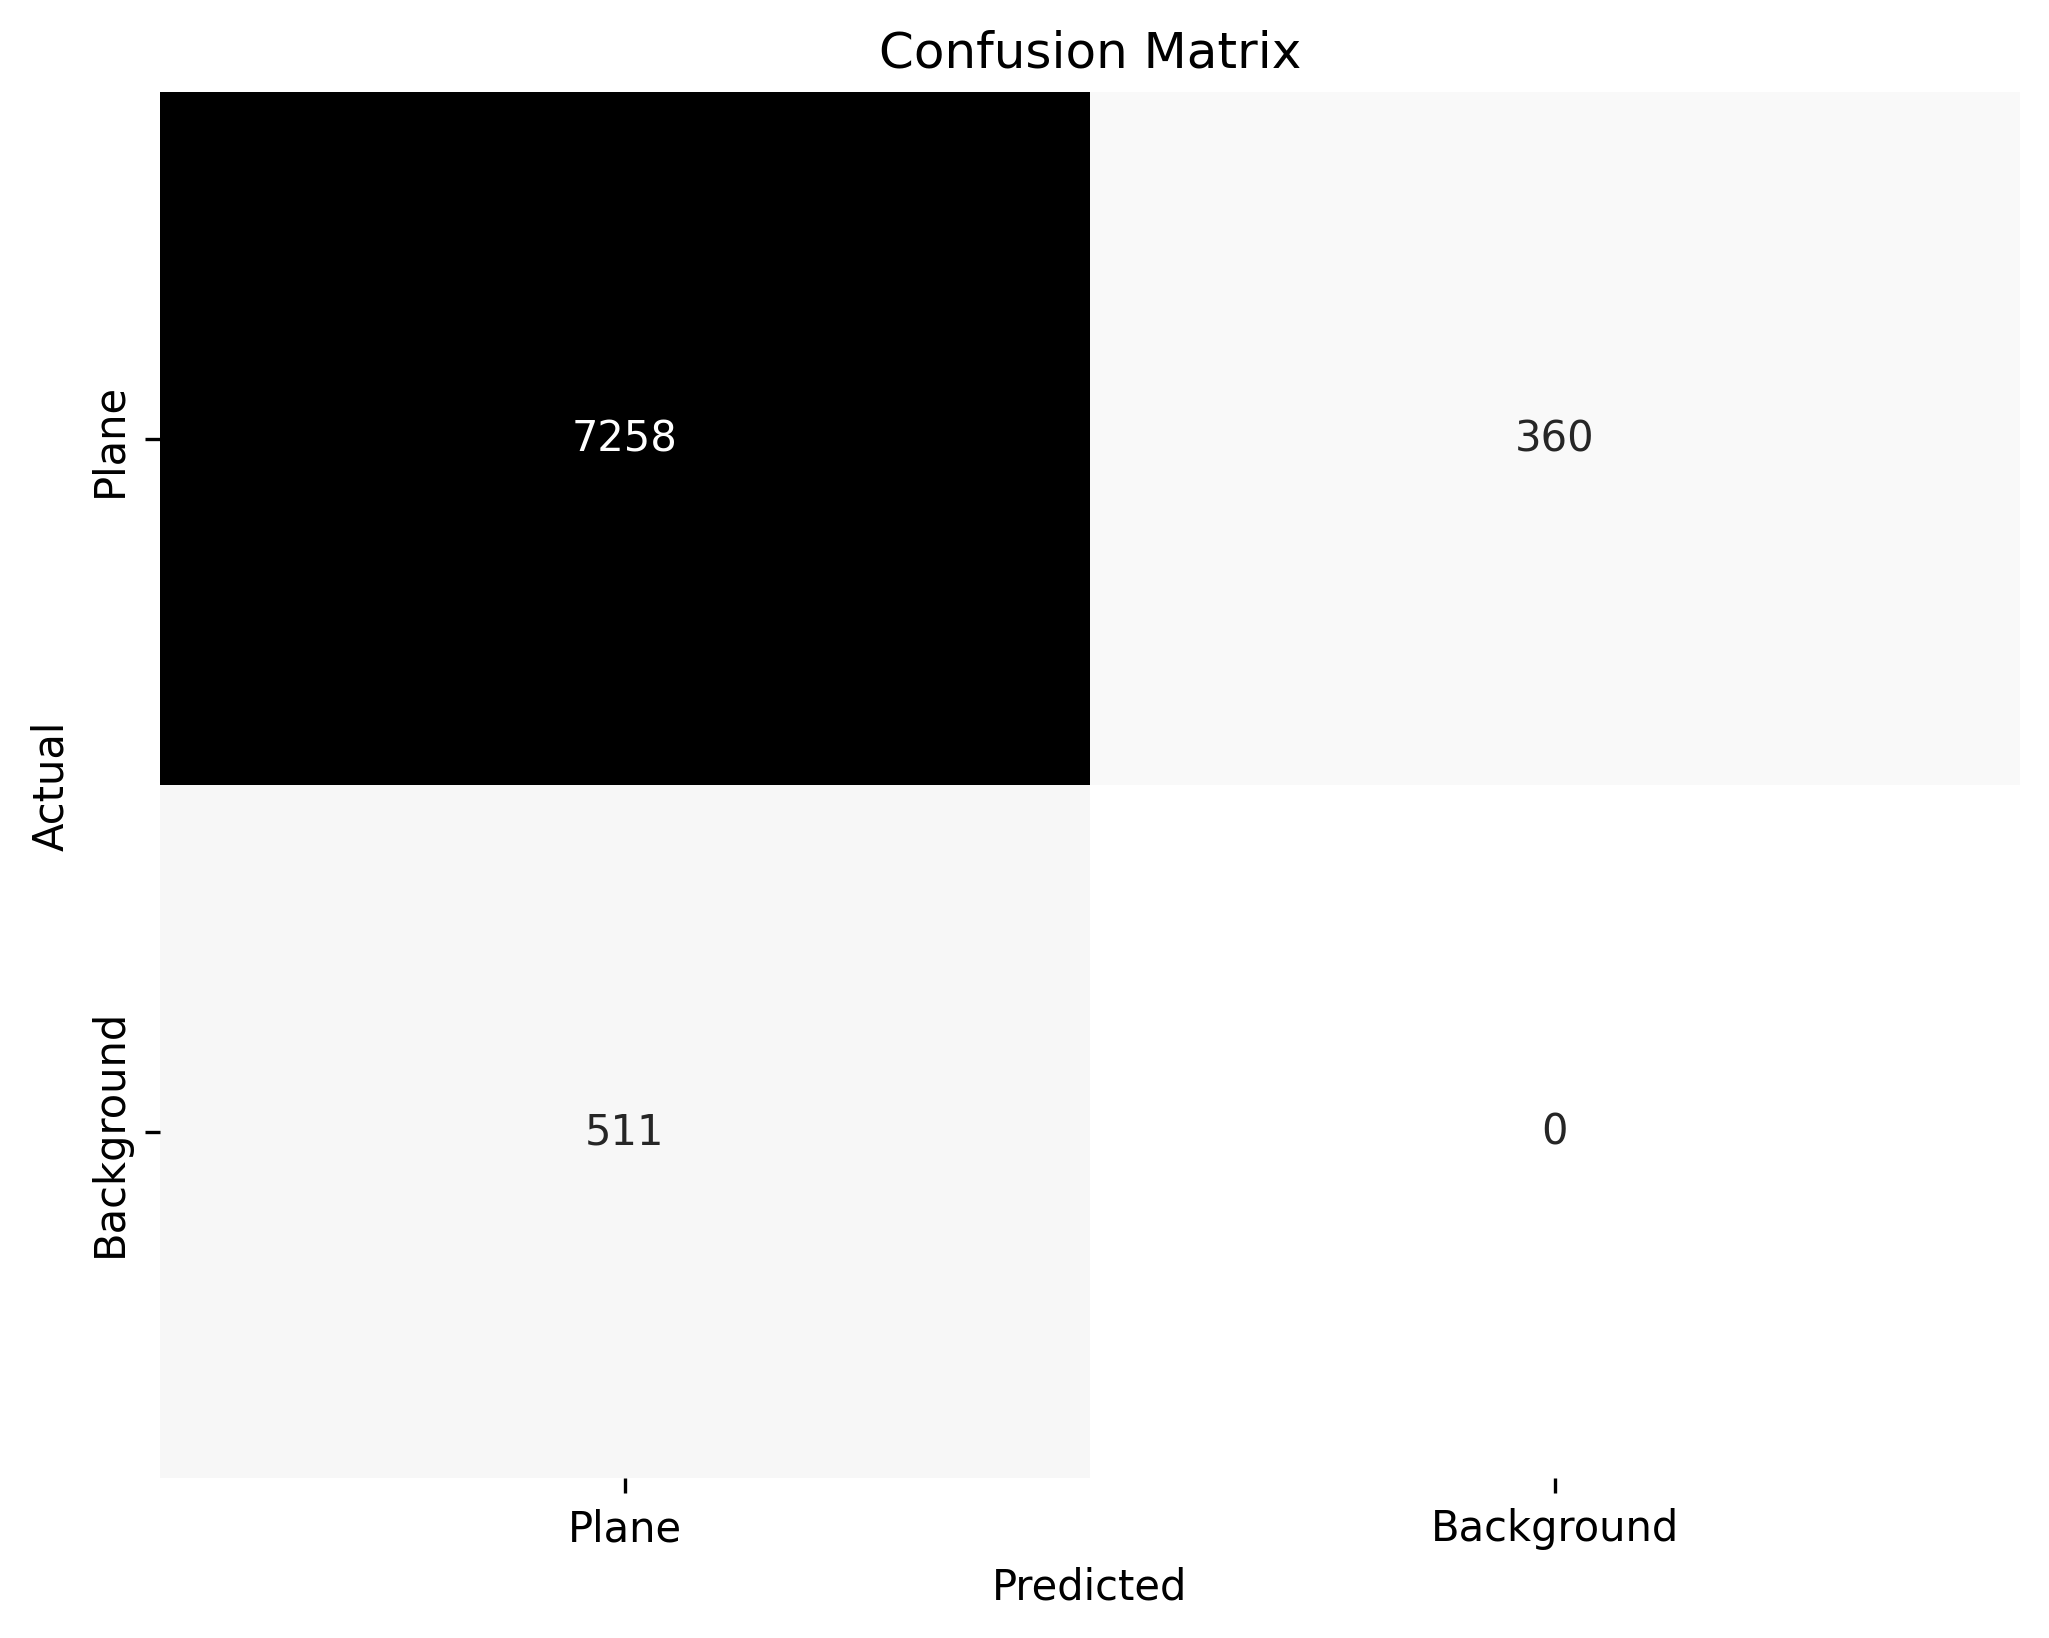

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 0.8929


#### **1.1.2. Train and Validate Model 2**

In [ ]:
# @markdown ---

IMAGE_SIZE = 640 # @param {type:"integer"}
BATCH = 16 # @param {type:"integer"}
LR = 0.001 # @param {type:"number"}
OPTIMIZER = 'AdamW' # @param {type:"string"}

# @markdown ---

HUE = 0.015 # @param {type:"number"}
SATURATION = 0.7 # @param {type:"number"}
VALUE = 0.4 # @param {type:"number"}
MOSIAC = 1.0 # @param {type:"number"}

# @markdown ---

In [ ]:
model = YOLO(MODEL_2_PT)

In [ ]:
results = model.train(data='/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/5-Transfer Learning/coco_transfer_learning.yaml', epochs=20, imgsz=IMAGE_SIZE, batch=BATCH, lr0=LR, optimizer=OPTIMIZER, hsv_h=HUE, hsv_s=SATURATION, hsv_v=VALUE, mosaic=MOSIAC)

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv8l/Experiment_No_32/detect/train/weights/best.pt, data=/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/5-Transfer Learning/coco_transfer_learning.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, class

train: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/train/labels.cache... 3764 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3764/3764 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/val/labels.cache... 1722 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1722/1722 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      10.8G       1.68     0.7953      1.523         22        640: 100%|██████████| 236/236 [00:49<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.64it/s]


                   all       1722       7769      0.926      0.808      0.872      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20        11G      1.622     0.7377      1.461         14        640: 100%|██████████| 236/236 [00:42<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.78it/s]


                   all       1722       7769      0.928      0.829       0.89      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      11.2G      1.597     0.7321       1.44         15        640: 100%|██████████| 236/236 [00:41<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.55it/s]


                   all       1722       7769       0.92      0.847      0.902      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      10.9G      1.573     0.7112      1.429         30        640: 100%|██████████| 236/236 [00:41<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.72it/s]


                   all       1722       7769       0.93      0.849      0.905      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20        11G      1.558     0.6895      1.437         15        640: 100%|██████████| 236/236 [00:41<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.79it/s]


                   all       1722       7769      0.941      0.855      0.912        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      11.3G      1.519     0.6778      1.414          5        640: 100%|██████████| 236/236 [00:41<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.83it/s]


                   all       1722       7769      0.932      0.863      0.913      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      10.9G      1.509     0.6747      1.427         36        640: 100%|██████████| 236/236 [00:41<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.88it/s]


                   all       1722       7769      0.934      0.873      0.921      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      11.3G      1.508     0.6677      1.417         17        640: 100%|██████████| 236/236 [00:41<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.68it/s]


                   all       1722       7769      0.941      0.866      0.922      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      10.9G      1.471     0.6531      1.405         24        640: 100%|██████████| 236/236 [00:41<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.00it/s]


                   all       1722       7769      0.943      0.873      0.924       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      11.2G      1.452     0.6405      1.378         23        640: 100%|██████████| 236/236 [00:41<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.01it/s]

                   all       1722       7769      0.939      0.878      0.925      0.531


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      11.3G      1.459     0.5932      1.439         15        640: 100%|██████████| 236/236 [00:44<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.79it/s]


                   all       1722       7769      0.933      0.879      0.925       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      11.3G      1.443      0.577      1.426          7        640: 100%|██████████| 236/236 [00:40<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.70it/s]


                   all       1722       7769      0.945      0.871      0.925      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      11.3G      1.439     0.5805      1.422         41        640: 100%|██████████| 236/236 [00:41<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.73it/s]


                   all       1722       7769      0.944      0.889      0.932      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      11.4G      1.392     0.5523      1.374         20        640: 100%|██████████| 236/236 [00:40<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.72it/s]


                   all       1722       7769      0.946       0.89      0.933       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      10.9G      1.391     0.5499      1.379         12        640: 100%|██████████| 236/236 [00:40<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.79it/s]


                   all       1722       7769      0.946      0.885      0.933      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      11.3G      1.376     0.5368      1.369          6        640: 100%|██████████| 236/236 [00:40<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.85it/s]


                   all       1722       7769      0.944      0.888      0.934      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      11.3G      1.362     0.5318      1.356         10        640: 100%|██████████| 236/236 [00:41<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.66it/s]

                   all       1722       7769      0.955      0.896      0.939       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      10.9G      1.342     0.5146      1.348         14        640: 100%|██████████| 236/236 [00:41<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.87it/s]


                   all       1722       7769      0.952      0.892      0.939      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      10.9G      1.319     0.5114      1.341          8        640: 100%|██████████| 236/236 [00:41<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.96it/s]


                   all       1722       7769       0.95      0.899      0.941      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      10.9G      1.315     0.5096      1.339          7        640: 100%|██████████| 236/236 [00:40<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.87it/s]


                   all       1722       7769      0.951      0.901      0.943      0.568

20 epochs completed in 0.307 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 87.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:14<00:00,  3.65it/s]


                   all       1722       7769       0.95      0.902      0.943      0.568
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
model = YOLO("runs/detect/train2/weights/best.pt")
metrics = model.val(data='/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/5-Transfer Learning/coco_transfer_learning.yaml')

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/val/labels.cache... 1722 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1722/1722 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/108 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R     

                   all       1722       7769       0.95      0.901      0.943      0.568
Speed: 0.1ms preprocess, 4.1ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val2


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.9425 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.5959 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.5678 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 0.9499 - Mean Precision of all classes.
metrics.box.mr: 0.9013 - Mean Recall of all classes.
metrics.box.p: 0.9499 - Precision for each class.
metrics.box.r: 0.9013 - Recall for each class.
metrics.box.f1: 0.9250 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

Precision: 0.9499 - Percentage of correct positive predictions.
Recall: 0.9013 - Percentage of actual positives that were correctly predicted.
mAP50: 0.9425 - Mean Average Precision at 50% IOU.
mAP50-95: 0.5678 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.9250 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

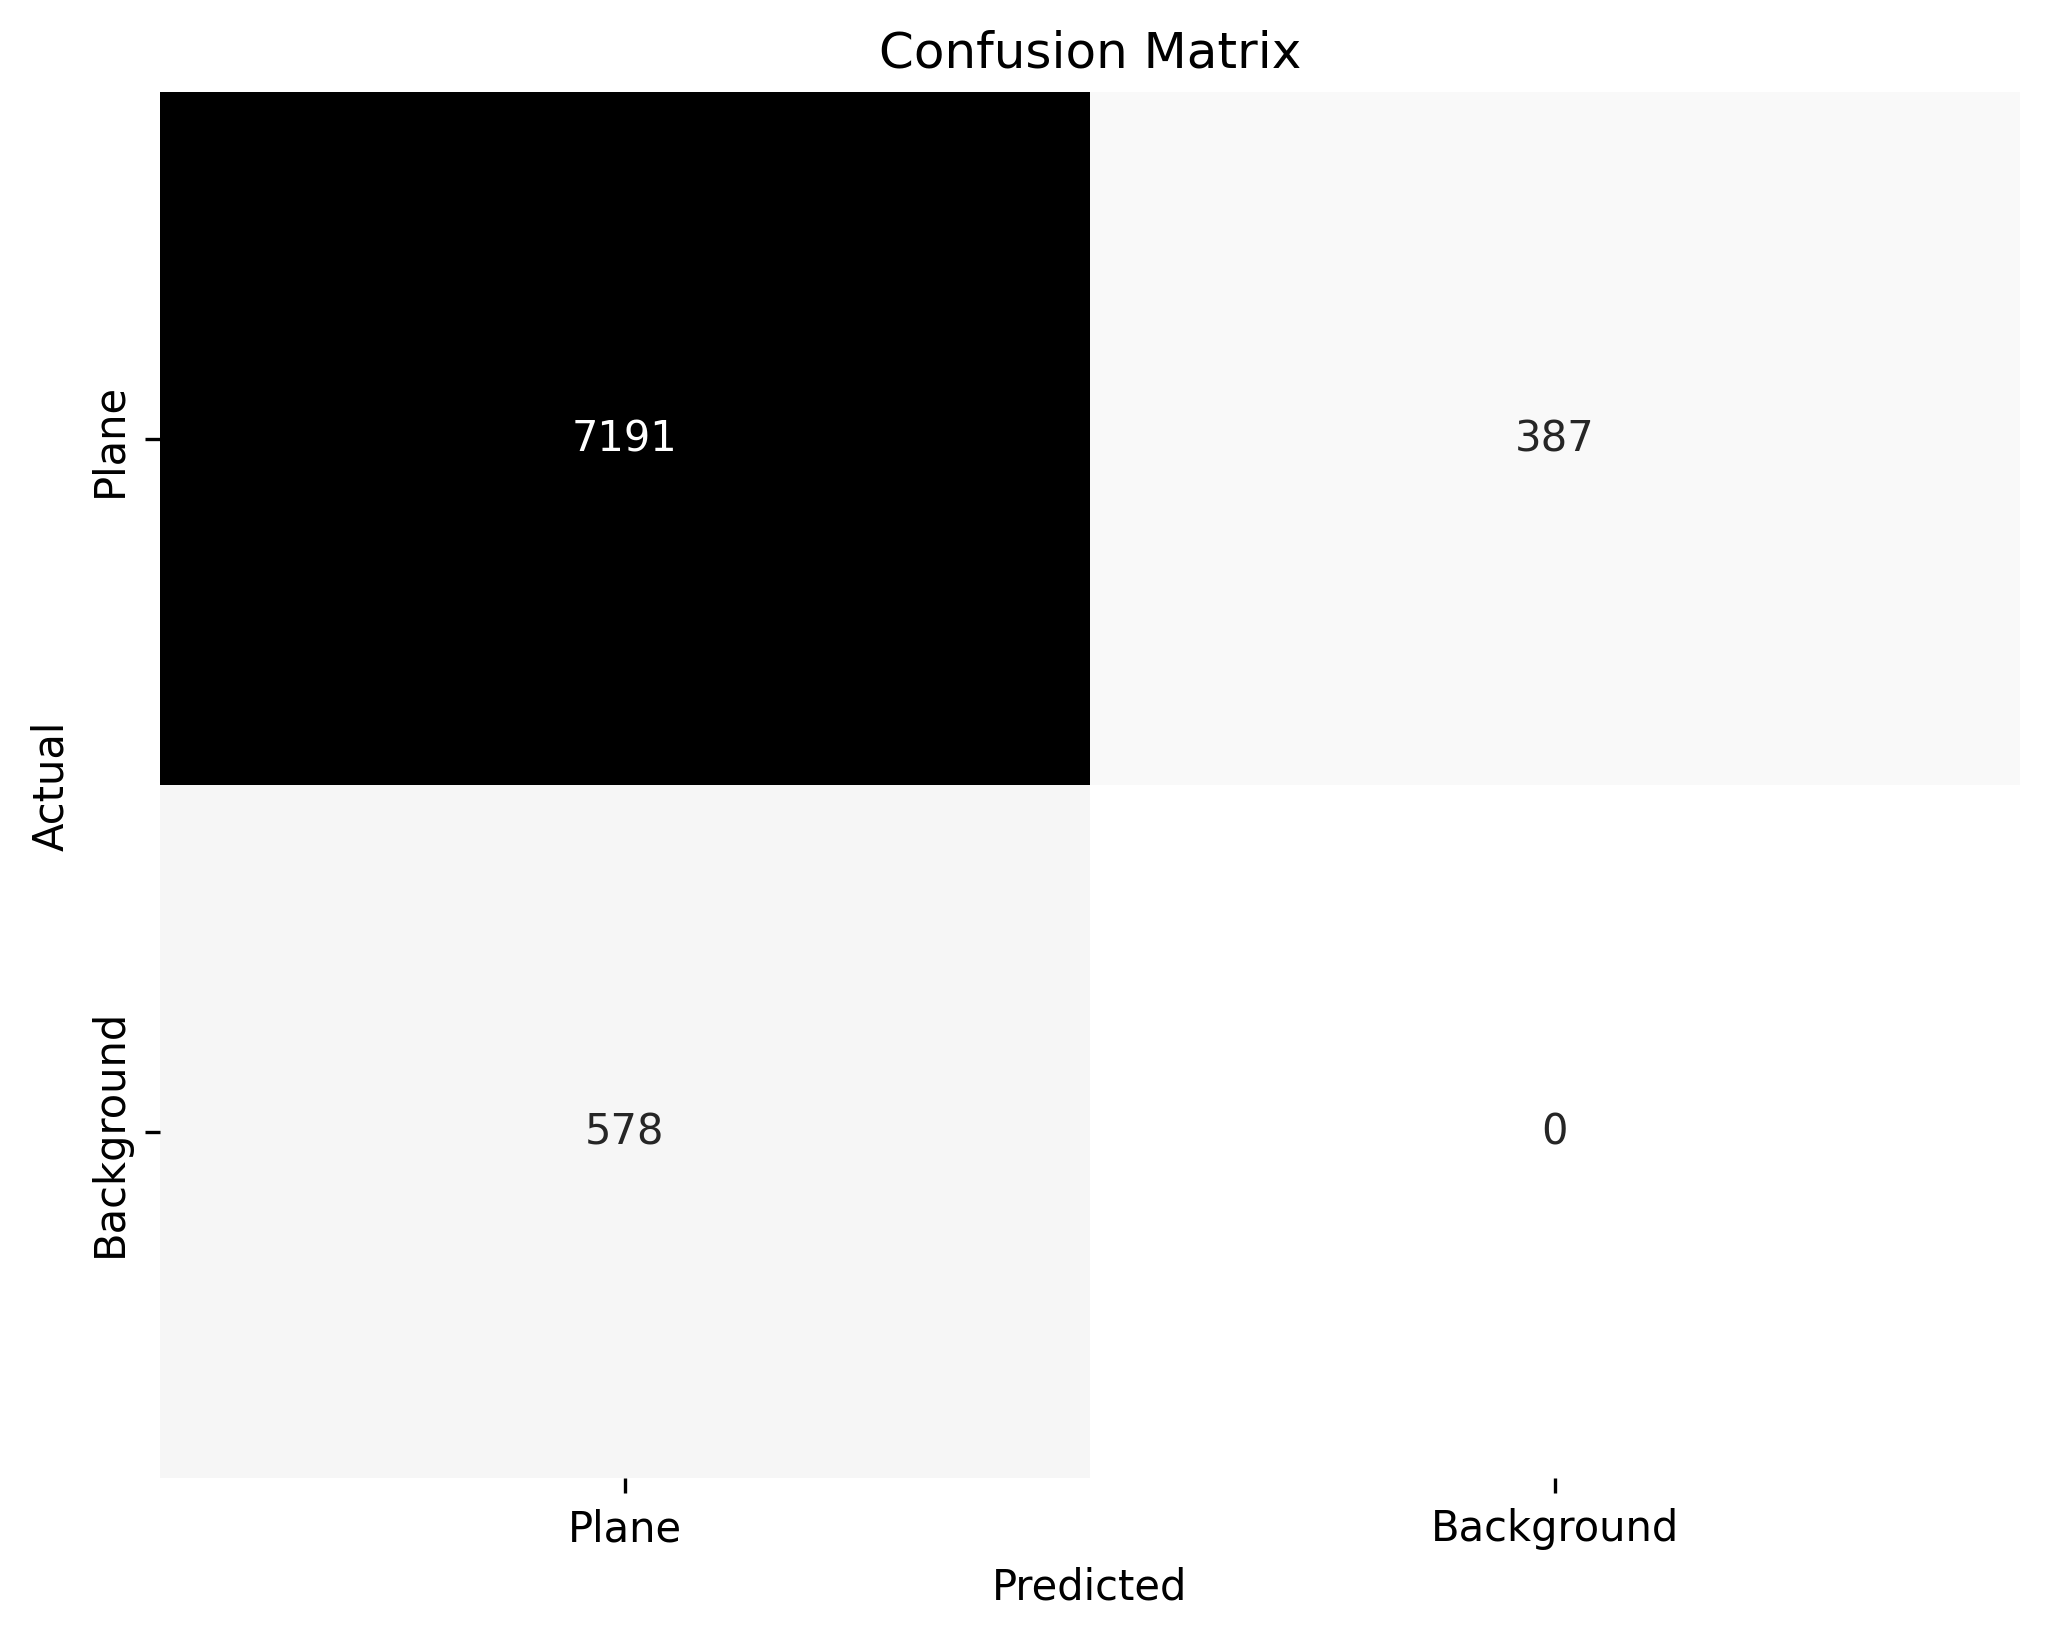

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 0.8817


#### **1.1.3. Train and Validate Model 3**

In [ ]:
# @markdown ---

IMAGE_SIZE = 640 # @param {type:"integer"}
BATCH = 16 # @param {type:"integer"}
LR = 0.001 # @param {type:"number"}
OPTIMIZER = 'SGD' # @param {type:"string"}

# @markdown ---

HUE = 0.015 # @param {type:"number"}
SATURATION = 0.7 # @param {type:"number"}
VALUE = 0.4 # @param {type:"number"}
MOSIAC = 1.0 # @param {type:"number"}

# @markdown ---

In [ ]:
model = YOLO(MODEL_3_PT)

In [ ]:
results = model.train(data='/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/5-Transfer Learning/coco_transfer_learning.yaml', epochs=20, imgsz=IMAGE_SIZE, batch=BATCH, lr0=LR, optimizer=OPTIMIZER, hsv_h=HUE, hsv_s=SATURATION, hsv_v=VALUE, mosaic=MOSIAC)

Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv8l/Experiment_No_30/detect/train/weights/best.pt, data=/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/5-Transfer Learning/coco_transfer_learning.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=

100%|██████████| 755k/755k [00:00<00:00, 111MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512

100%|██████████| 6.25M/6.25M [00:00<00:00, 353MB/s]


AMP: checks passed ✅


train: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/train/labels... 3764 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3764/3764 [09:05<00:00,  6.90it/s]


train: New cache created: /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.15 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/val/labels... 1722 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1722/1722 [04:24<00:00,  6.50it/s]


val: New cache created: /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      10.6G      1.689      0.722      1.537         21        640: 100%|██████████| 236/236 [01:07<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:13<00:00,  3.90it/s]


                   all       1722       7769      0.918      0.852      0.901      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      10.2G      1.592     0.6357      1.364          8        640: 100%|██████████| 236/236 [00:41<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.92it/s]


                   all       1722       7769      0.921      0.871      0.916      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      10.4G      1.535     0.6193      1.334         11        640: 100%|██████████| 236/236 [00:40<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.86it/s]


                   all       1722       7769      0.934      0.887      0.925      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      10.2G      1.487     0.6163      1.317         23        640: 100%|██████████| 236/236 [00:40<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.95it/s]


                   all       1722       7769      0.938      0.891       0.93      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      10.3G       1.47     0.6025      1.299         19        640: 100%|██████████| 236/236 [00:40<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.95it/s]

                   all       1722       7769      0.943       0.89      0.933      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      10.7G      1.427     0.5905      1.282         14        640: 100%|██████████| 236/236 [00:40<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.90it/s]

                   all       1722       7769      0.935      0.895      0.932       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      10.1G       1.41     0.5836      1.275         19        640: 100%|██████████| 236/236 [00:40<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.95it/s]

                   all       1722       7769      0.948        0.9       0.94      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      10.3G      1.385     0.5635      1.265         23        640: 100%|██████████| 236/236 [00:40<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.99it/s]


                   all       1722       7769      0.944      0.901       0.94      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      10.2G      1.351     0.5536      1.232         15        640: 100%|██████████| 236/236 [00:40<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.00it/s]

                   all       1722       7769      0.949      0.905      0.943       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      10.2G      1.341     0.5502      1.233         33        640: 100%|██████████| 236/236 [00:40<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.95it/s]

                   all       1722       7769      0.951      0.907      0.945      0.563


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      10.6G      1.317     0.4944      1.237         14        640: 100%|██████████| 236/236 [00:44<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.13it/s]

                   all       1722       7769      0.944      0.904      0.942       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      10.3G      1.304     0.4876      1.243          9        640: 100%|██████████| 236/236 [00:40<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.08it/s]

                   all       1722       7769      0.944      0.903      0.942      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      10.6G      1.289     0.4823      1.229         19        640: 100%|██████████| 236/236 [00:40<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.04it/s]

                   all       1722       7769      0.953      0.911      0.946      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      10.6G      1.264      0.482      1.223         21        640: 100%|██████████| 236/236 [00:40<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.96it/s]

                   all       1722       7769      0.948       0.91      0.946       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      10.2G      1.248     0.4659      1.216         10        640: 100%|██████████| 236/236 [00:40<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.04it/s]


                   all       1722       7769      0.956      0.908      0.948      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      10.6G      1.235     0.4646      1.197          7        640: 100%|██████████| 236/236 [00:40<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.07it/s]


                   all       1722       7769      0.951       0.91      0.948      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      10.6G      1.229     0.4583      1.188          4        640: 100%|██████████| 236/236 [00:40<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.90it/s]


                   all       1722       7769      0.956      0.911      0.949      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      10.2G      1.208      0.451      1.189         12        640: 100%|██████████| 236/236 [00:40<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.95it/s]


                   all       1722       7769      0.959      0.914      0.951      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      10.2G      1.199     0.4517      1.177          8        640: 100%|██████████| 236/236 [00:40<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.83it/s]


                   all       1722       7769      0.957      0.915      0.951      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      10.6G      1.188     0.4433      1.168          7        640: 100%|██████████| 236/236 [00:40<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.04it/s]


                   all       1722       7769      0.953      0.915      0.949      0.581

20 epochs completed in 0.305 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:14<00:00,  3.70it/s]


                   all       1722       7769      0.959      0.913      0.951      0.582
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


In [ ]:
# model = YOLO("runs/detect/train3/weights/best.pt")
model = YOLO("runs/detect/train/weights/best.pt")
metrics = model.val(data='/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/5-Transfer Learning/coco_transfer_learning.yaml')

Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /gdrive/.shortcut-targets-by-id/1vm60fy0ismvMuhLfvW5phF0J1b9OKLLf/HRPlanes/YOLOV8/CORS_AD_HBB/val/labels.cache... 1722 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1722/1722 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:28<00:00,  3.74it/s]


                   all       1722       7769      0.959      0.913      0.951      0.582
Speed: 0.1ms preprocess, 3.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val


In [ ]:
# @markdown Run this code block to monitor **box** metrics.

attributes = [
    ('metrics.box.map50', 'Mean Average Precision at IoU threshold of 0.5 for all classes.'),
    ('metrics.box.map75', 'Mean Average Precision at IoU threshold of 0.75 for all classes.'),
    ('metrics.box.ap', 'Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.'),
    ('metrics.box.mp', 'Mean Precision of all classes.'),
    ('metrics.box.mr', 'Mean Recall of all classes.'),
    # ('metrics.box.mean_results', 'Mean of results, returns Mean Precision, Mean Recall, Mean Average Precision at IoU threshold of 0.5, Mean Average Precision at IoU threshold of 0.5 to 0.95.'),
    ('metrics.box.p', 'Precision for each class.'),
    ('metrics.box.r', 'Recall for each class.'),
    ('metrics.box.f1', 'F1 score for each class.'),
    ('metrics.box.nc', 'Number of classes.')
]

for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    print(f'{attr}: {value:.4f} - {explanation}')

box_metrics_dict = {}
for attr, explanation in attributes:
    value = getattr(metrics.box, attr.split('.')[-1])
    if isinstance(value, np.ndarray):
        value = np.float64(value[0])
    box_metrics_dict[attr] = {
        "value": value,
        "description": explanation
    }

metrics.box.map50: 0.9505 - Mean Average Precision at IoU threshold of 0.5 for all classes.
metrics.box.map75: 0.6154 - Mean Average Precision at IoU threshold of 0.75 for all classes.
metrics.box.ap: 0.5824 - Average Precision at IoU thresholds from 0.5 to 0.95 for all classes.
metrics.box.mp: 0.9586 - Mean Precision of all classes.
metrics.box.mr: 0.9130 - Mean Recall of all classes.
metrics.box.p: 0.9586 - Precision for each class.
metrics.box.r: 0.9130 - Recall for each class.
metrics.box.f1: 0.9352 - F1 score for each class.
metrics.box.nc: 1.0000 - Number of classes.


In [ ]:
# @markdown Run this block to monitor **best** metrics.

for key, value in metrics.results_dict.items():
    if key == 'metrics/precision(B)':
        print(f'Precision: {value:.4f} - Percentage of correct positive predictions.')
    elif key == 'metrics/recall(B)':
        print(f'Recall: {value:.4f} - Percentage of actual positives that were correctly predicted.')
    elif key == 'metrics/mAP50(B)':
        print(f'mAP50: {value:.4f} - Mean Average Precision at 50% IOU.')
    elif key == 'metrics/mAP50-95(B)':
        print(f'mAP50-95: {value:.4f} - Mean Average Precision between 50% and 95% IOU.')
    # else:
    #     print(f'{key}: {value:.4f}')

precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'F1 Score: {f1_score:.4f} - Harmonic mean of precision and recall.')

Precision: 0.9586 - Percentage of correct positive predictions.
Recall: 0.9130 - Percentage of actual positives that were correctly predicted.
mAP50: 0.9505 - Mean Average Precision at 50% IOU.
mAP50-95: 0.5824 - Mean Average Precision between 50% and 95% IOU.
F1 Score: 0.9352 - Harmonic mean of precision and recall.


Plot confusion matrix for the predictions.

In [ ]:
cm = metrics.confusion_matrix.matrix

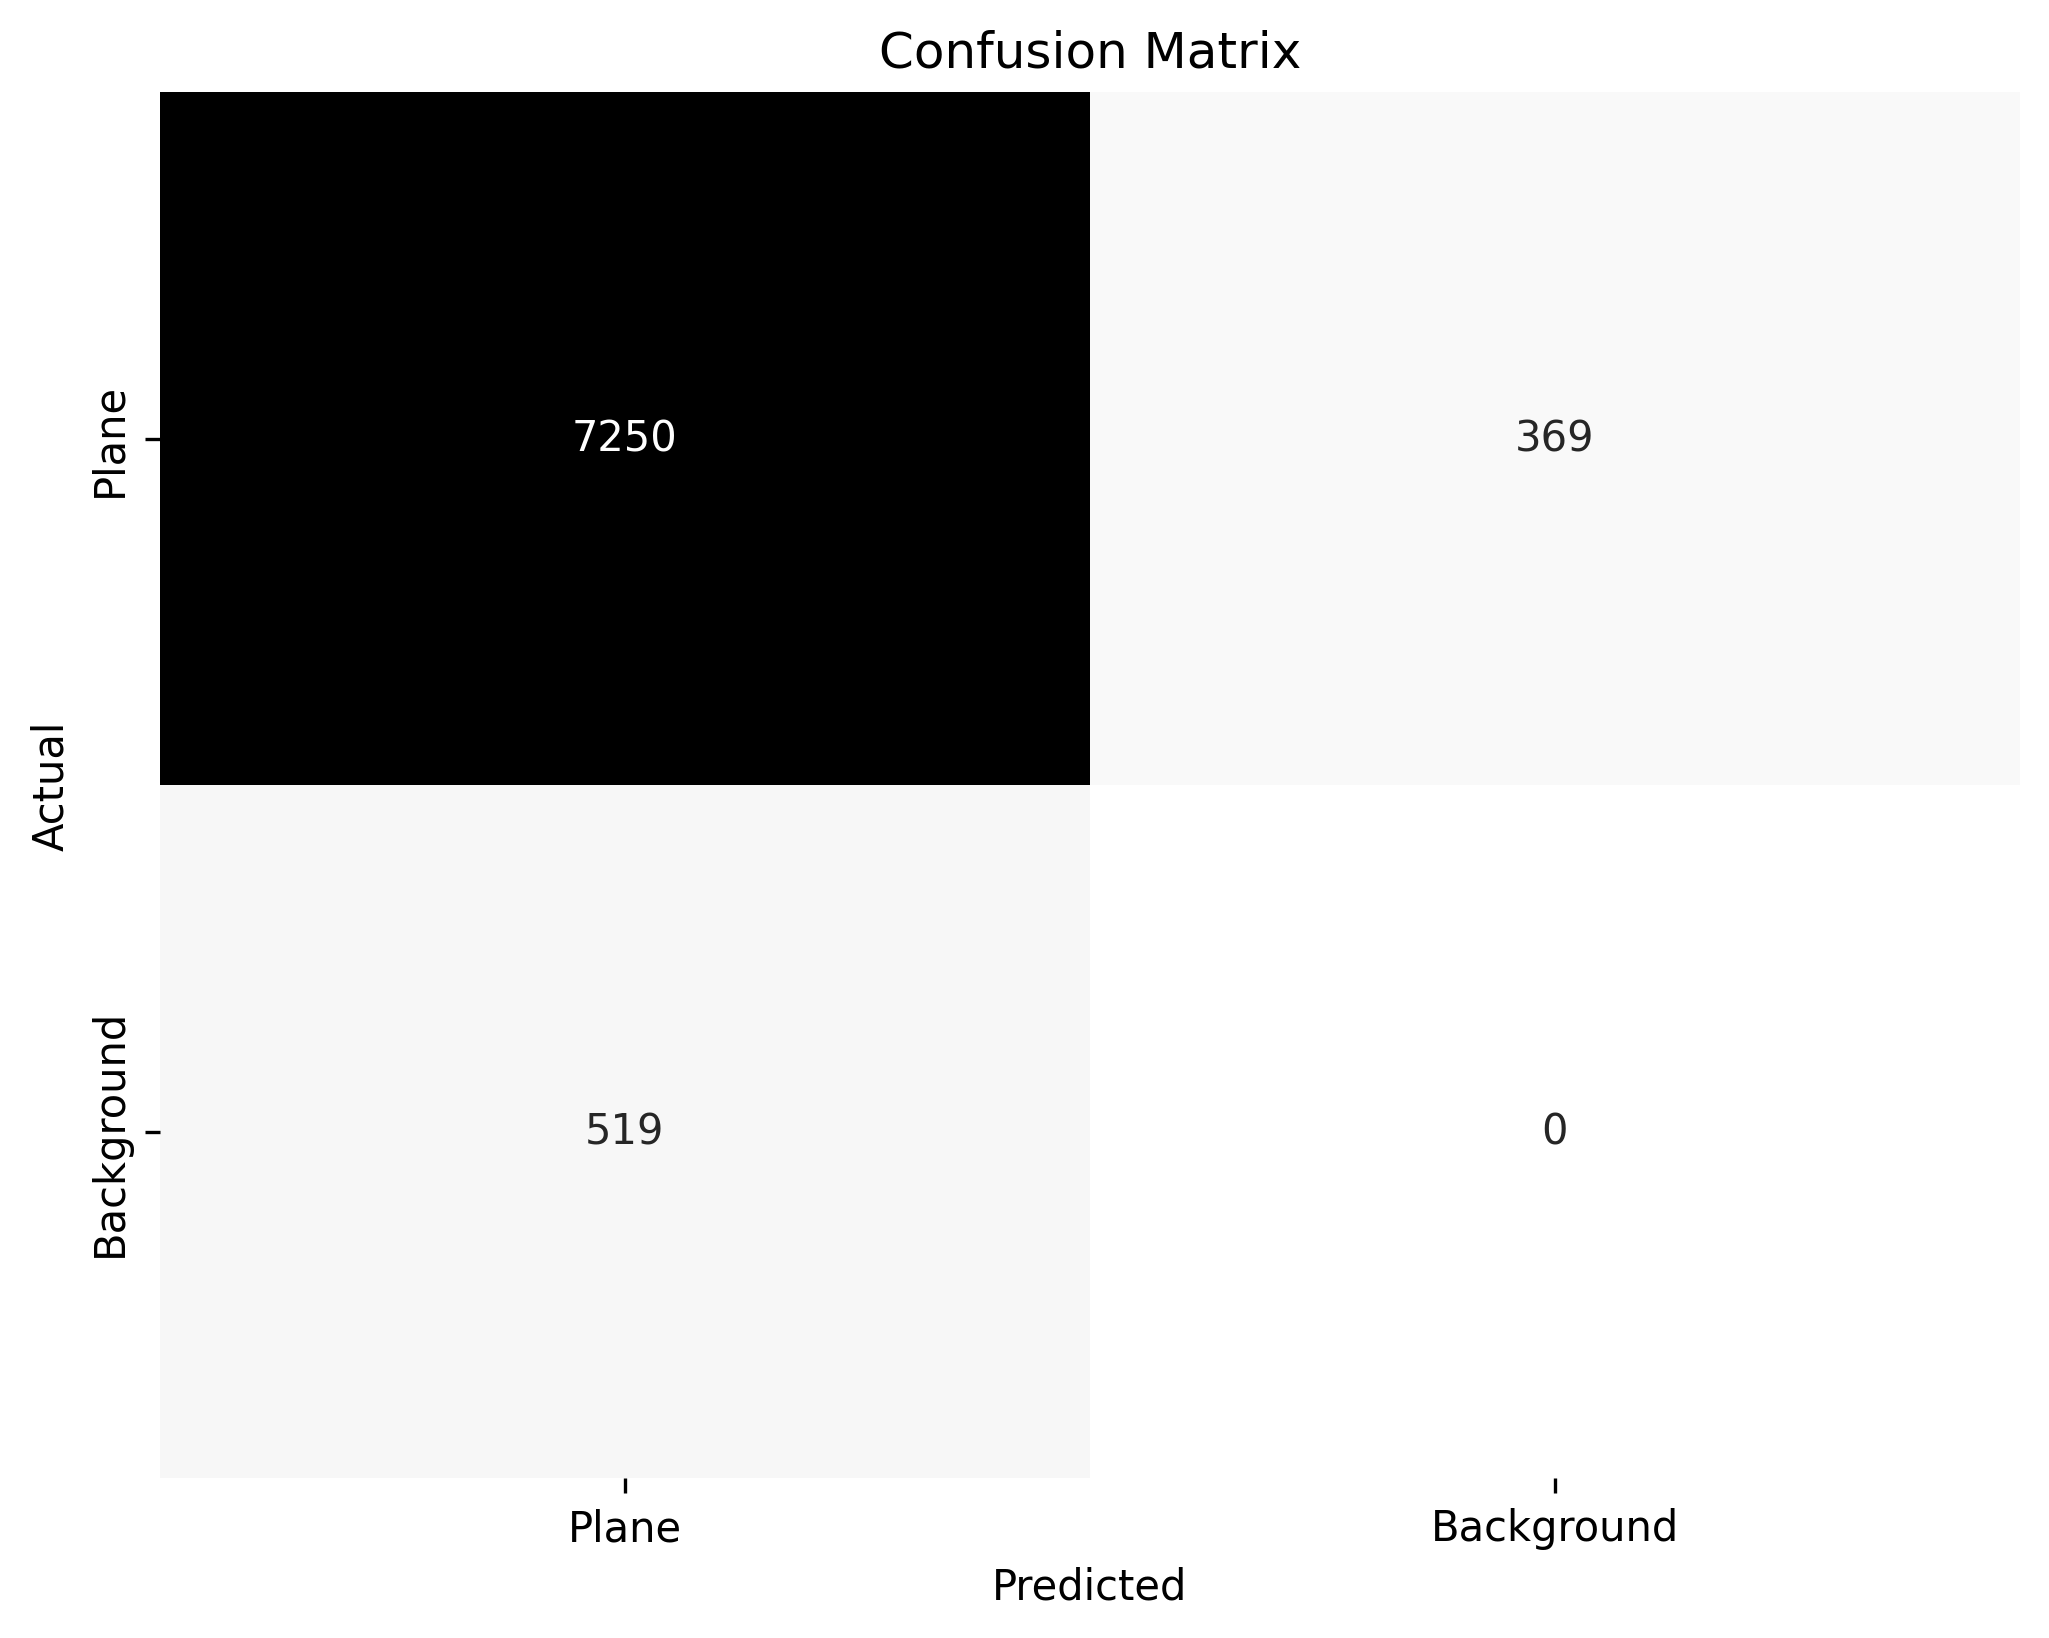

In [ ]:
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm.astype(int), annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.yticks(ticks=[0.5, 1.5], labels=['Plane', 'Background'])
plt.show()

In [ ]:
TP = int(cm[0][0])
FN = int(cm[1][0])
FP = int(cm[0][1])

accuracy = calculate_accuracy(TP, FN, FP)

print("Accuracy:", round(accuracy, 4))

Accuracy: 0.8909


### **1.2. Train and Validate Top YOLOv9 Models**

In this section, we detail the training and validation process of the top-performing YOLOv9 models using the HRPlanes dataset. The models are trained on a subset of the dataset and validated on a separate subset to ensure robust performance before further evaluation.

In [ ]:
!git clone https://github.com/WongKinYiu/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 781, done.
remote: Total 781 (delta 0), reused 0 (delta 0), pack-reused 781 (from 1)
Receiving objects: 100% (781/781), 3.27 MiB | 2.03 MiB/s, done.
Resolving deltas: 100% (330/330), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.2 MB/s eta 0:00:00


#### **1.2.1. Train and Validate Model 4**

In [ ]:
# @markdown ---

IMAGE_SIZE = 640 # @param {type:"integer"}
BATCH = 16 # @param {type:"integer"}
# SGD, Adam, AdamW
OPTIMIZER = 'SGD' # @param {type:"string"}

# @markdown ---

**IMPORTANT:** Before training, check hyperparameters in `/content/yolov9/data/hyps/hyp.scratch-high.yaml`.

In [ ]:
!python train_dual.py \
--batch-size {BATCH} --epochs 20 --imgsz {IMAGE_SIZE} --device 0 \
--data /content/coco_transfer_learning.yaml \
--weights {MODEL_4_PT} \
--cfg models/detect/yolov9-e.yaml \
--hyp hyp.scratch-high.yaml \
--optimizer {OPTIMIZER}

train_dual: weights=/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv9e/Experiment_No_58/epoch_75_100/runs/train/exp/weights/best.pt, cfg=models/detect/yolov9-e.yaml, data=/content/coco_transfer_learning.yaml, hyp=hyp.scratch-high.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=0, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

hyperparameters: lr0=0.001, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_

In [ ]:
!python val_dual.py \
--img 640 --batch 16 \
--data /content/coco_transfer_learning.yaml \
--weights /content/yolov9/runs/train/exp/weights/best.pt

val_dual: data=/content/coco_transfer_learning.yaml, weights=['/gdrive/MyDrive/4.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be 

#### **1.2.2. Train and Validate Model 5**

In [ ]:
# @markdown ---

IMAGE_SIZE = 640 # @param {type:"integer"}
BATCH = 16 # @param {type:"integer"}
# SGD, Adam, AdamW
OPTIMIZER = 'SGD' # @param {type:"string"}

# @markdown ---

**IMPORTANT:** Before training, check hyperparameters in `/content/yolov9/data/hyps/hyp.scratch-high.yaml`.

In [ ]:
!python train_dual.py \
--batch-size {BATCH} --epochs 20 --imgsz {IMAGE_SIZE} --device 0 \
--data /content/coco_transfer_learning.yaml \
--weights {MODEL_5_PT} \
--cfg models/detect/yolov9-e.yaml \
--hyp hyp.scratch-high.yaml \
--optimizer {OPTIMIZER}

train_dual: weights=/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv9e/Experiment_No_57/runs/train/exp/weights/best.pt, cfg=models/detect/yolov9-e.yaml, data=/content/coco_transfer_learning.yaml, hyp=hyp.scratch-high.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=0, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

hyperparameters: lr0=0.001, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8,

In [ ]:
!python val_dual.py \
--img 640 --batch 16 \
--data /content/coco_transfer_learning.yaml \
--weights /content/yolov9/runs/train/exp2/weights/best.pt

val_dual: data=/content/coco_transfer_learning.yaml, weights=['/gdrive/MyDrive/5.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be 

#### **1.2.3. Train and Validate Model 6**

In [ ]:
# @markdown ---

IMAGE_SIZE = 640 # @param {type:"integer"}
BATCH = 16 # @param {type:"integer"}
# SGD, Adam, AdamW
OPTIMIZER = 'AdamW' # @param {type:"string"}

# @markdown ---

**IMPORTANT:** Before training, check hyperparameters in `/content/yolov9/data/hyps/hyp.scratch-high.yaml`.

In [ ]:
!python train_dual.py \
--batch-size {BATCH} --epochs 20 --imgsz {IMAGE_SIZE} --device 0 \
--data /content/coco_transfer_learning.yaml \
--weights {MODEL_6_PT} \
--cfg models/detect/yolov9-e.yaml \
--hyp hyp.scratch-high.yaml \
--optimizer {OPTIMIZER}

train_dual: weights=/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/YOLOv9e/Experiment_No_62/epoch_75_100/runs/train/exp/weights/best.pt, cfg=models/detect/yolov9-e.yaml, data=/content/coco_transfer_learning.yaml, hyp=hyp.scratch-high.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=AdamW, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=0, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup

In [ ]:
!python val_dual.py \
--img 640 --batch 16 \
--data /content/coco_transfer_learning.yaml \
--weights /content/yolov9/runs/train/exp3/weights/best.pt

val_dual: data=/content/coco_transfer_learning.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits th

## **3. Move Model Items into Google Drive**

Instead of uploading and downloading files, we can directly move them to the desired path.

In [ ]:
shutil.move("/content/runs/detect/", "/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/5-Transfer Learning/YOLOv8 Models/")

'/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/5-Transfer Learning/YOLOv8 Models/detect'

In [ ]:
shutil.move("/content/yolov9/runs/", "/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/5-Transfer Learning/YOLOv9 Models/")

'/gdrive/MyDrive/Datasets/HRPlanes/YOLOV8/5-Transfer Learning/YOLOv9 Models/runs'

## **Conclusion**
Transfer learning emerges as a promising approach to enhance the generalization performance of object detection models. By leveraging pre-trained models and adapting them to new datasets through targeted updates, we can effectively transfer knowledge across domains. The results obtained from this experiment shed light on the real-world applicability and reliability of YOLOv8 and YOLOv9 architectures beyond their original training domains.

In [ ]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2024-09-13 10:11:51
